<a href="https://colab.research.google.com/github/leticiaschaves/leticiaschaves/blob/data-projects/LESSON_02_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
digitos = datasets.load_digits()

In [ ]:
x = pd.DataFrame(data = digitos['data'], columns=digitos['feature_names'])
y = pd.DataFrame(data = digitos['target'], columns = ['target'])

In [ ]:
y['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

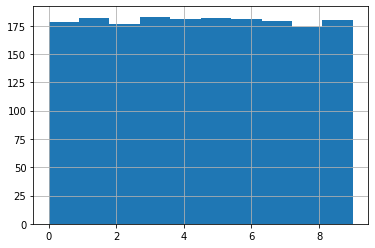

In [ ]:
y['target'].hist()

In [ ]:
execucoes = 10
n_folds = 8
seed = random.randint(0, 2000)
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

lista_acuracias= []
lista_f1_scores= []

for train_index, val_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index, :], x.iloc[val_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[val_index]
  for run in range(execucoes):
    model = GaussianNB()
    model.fit(x_train, y_train.values.ravel())
    predicoes = model.predict(x_test)

    acc = accuracy_score(y_test, predicoes)
    lista_acuracias.append(acc)

    _f1_score = f1_score(y_test, predicoes, average='weighted')
    lista_f1_scores.append(_f1_score)

In [ ]:
acc, acc_std = np.array(lista_acuracias).mean(), np.array(lista_acuracias).std()
acc, acc_std

(0.8380902777777777, 0.03696843205951485)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
execucoes = 10
n_folds = 8
seed = random.randint(0, 2000)
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

lista_acuracias= []
lista_f1_scores= []

for train_index, val_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index, :], x.iloc[val_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[val_index]
  for run in range(execucoes):
    model = DecisionTreeClassifier(random_state=seed)
    model.fit(x_train, y_train.values.ravel())
    predicoes = model.predict(x_test)

    acc = accuracy_score(y_test, predicoes)
    lista_acuracias.append(acc)

    _f1_score = f1_score(y_test, predicoes, average='weighted')
    lista_f1_scores.append(_f1_score)

In [ ]:
acc, acc_std = np.array(lista_acuracias).mean(), np.array(lista_acuracias).std()
acc, acc_std

(0.8603298611111111, 0.023545938752226284)